In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import scipy
import seaborn as sns
import matplotlib.font_manager as fm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import warnings


Bad key text.latex.preview in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
warnings.simplefilter('ignore')

In [3]:
font_path = "C:\\Users\\spa84\\Downloads\\text_mining\\NanumGothic.ttf"  # 나눔 폰트의 경로를 지정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)

In [4]:
path = './data/'

df = pd.read_csv(path+'Coordinates_Preprocessed.csv')

In [5]:
df

,Building_Age,JS_Price,JS_BA,Population,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Sell_Price,Crime_Rates,IR,Region_Name,Building_Use,YearMonth,Shortest_Distance_to_Subway,Shortest_Distance_to_School,Shortest_Distance_to_Univ,Shortest_Distance_to_Park
0,14,22500,84.70,433809,4.1,90.4,95.3,91.0,107.634598,91.7,39900.00,0.967620,1.25,강동구,아파트,201703,218.546662,342.320637,2080.047982,159.232767
1,0,16000,17.45,662019,3.4,98.0,101.1,99.1,112.039216,131.7,18000.00,0.834577,1.25,송파구,오피스텔,201912,365.167081,428.396368,2078.432085,1250.766345
2,30,42000,108.47,553927,2.7,78.0,84.3,81.7,120.439963,74.7,135000.00,1.537764,2.50,강남구,아파트,201310,698.127221,334.807784,1514.222790,918.048403
3,4,48000,84.95,674828,2.9,72.9,80.0,77.1,114.366829,79.4,91646.15,1.145652,3.25,송파구,아파트,201110,536.947700,24.176463,3817.518298,838.633151
4,0,70000,84.99,302243,2.1,109.0,109.0,110.3,87.677816,167.9,108000.00,0.725826,2.50,서대문구,아파트,202208,1173.890039,335.949816,1165.416466,701.477137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,133000,84.86,530126,3.4,102.6,101.3,100.8,128.819696,158.1,193333.33,1.352069,0.50,강남구,아파트,202011,1341.605321,298.254673,3567.318940,1272.216183
4996,10,49000,84.91,427540,3.1,74.5,81.5,78.5,102.461258,74.2,81850.00,1.221012,3.00,서초구,아파트,201207,440.715060,269.506677,1053.568719,2804.609144
4997,0,23000,30.00,425539,4.5,93.9,98.0,94.1,94.786910,106.1,27038.00,0.907344,1.50,강동구,연립다세대,201803,364.897534,391.843327,1835.115994,251.807047
4998,0,71000,84.65,571614,3.8,106.9,103.8,103.4,117.233889,177.7,110000.00,0.671993,0.50,강서구,아파트,202106,0.000000,809.669099,2549.064034,864.197138


In [6]:
df = df[df['Region_Name'].isin(['강남구', '서초구', '송파구'])]

In [7]:
df.drop('YearMonth', axis=1, inplace=True)
df.drop('Region_Name', axis=1, inplace=True)
df.drop('Building_Use', axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1150 entries, 1 to 4996
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Building_Age                 1150 non-null   int64  
 1   JS_Price                     1150 non-null   int64  
 2   JS_BA                        1150 non-null   float64
 3   Population                   1150 non-null   int64  
 4   UR                           1150 non-null   float64
 5   LC_index                     1150 non-null   float64
 6   CA_index                     1150 non-null   float64
 7   TC_index                     1150 non-null   float64
 8   SDT_index                    1150 non-null   float64
 9   HSP_index                    1150 non-null   float64
 10  Sell_Price                   1150 non-null   float64
 11  Crime_Rates                  1150 non-null   float64
 12  IR                           1150 non-null   float64
 13  Shortest_Distance_

## Categorical:

- Nominal(variables that have two or more categories, but which do not have an intrinsic order.)

    - Region_Name : 자치구 명
    - Building_Use : 건물 용도
    
- Ordinal(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)

    
## Numeric:

- Discrete
    - YearMonth : 년월
    - Building_Age : 건물연식
    - JS_Price : 전세가
   
- Continous
    - Sell_Price : 매매 가격
    - JS_BA = JS_Building Area : 임대 면적
    - lR = Interest Rate : 금리
    - UR = Unemployment Rate : 실업률
    - LC_index = Leading Composite index : 선행종합 지수
    - CA_index = Comprehensive Accompany index : 동행종합 지수
    - TC_index = Trailing Composite index : 후행종합 지수
    - SDT_index = Supply and Demand Trend index = 전세수급동향 지수
    - HSP_index = 
    - Population : 인구수
    - Crime_Rates : 범죄율
    - Shortest_Distance_to_Subway : 가장 가까운 지하철역과의 거리
    - Shortest_Distance_to_School : 가장 가까운 초중고등학교와의 거리
    - Shortest_Distance_to_Univ : 가장 가까운 대학교와의 거리
    - Shortest_Distance_to_Park : 가장 가까운 공원과의 거리
    

## 데이터 전처리

### 이상치 제거

In [9]:
def detect_outliers(df, features_to_process):

    df_cleaned = df.copy()
    
    for feature in features_to_process:
        Q1 = df_cleaned[feature].quantile(0.25)
        Q3 = df_cleaned[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # IQR 범위 밖의 데이터를 이상치로 간주하고 제거
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_bound) & (df_cleaned[feature] <= upper_bound)]
    
    return df_cleaned

In [10]:
df = detect_outliers(df, [df.columns])

In [11]:
df.dropna(inplace=True)

### 범주형 변수 인코딩

In [12]:
# 범주형 변수 더미화 함수, 범주형 변수의 범주 레벨 간의 관계가 중요할 시 사용
def oh_encoding(df):
    # DataFrame의 복사본을 만듭니다.
    df_encoded = df.copy()
    columns_encoded = []
    for column in df.columns:
        if df[column].dtype == object:
            df_encoded = pd.get_dummies(df_encoded, columns=[column], prefix=column)
            columns_encoded.append(column)
    return df_encoded, columns_encoded

In [13]:
df_encoded, columns_encoded = oh_encoding(df)

### 전체 변수 스케일링

In [14]:
# Min-Max 스케일러 생성
scaler = MinMaxScaler()

# 정규화할 열 선택 (수치형 데이터만, 원핫인코딩 열 제외)
numeric_columns = df_encoded.select_dtypes(include=['float', 'int']).columns
numeric_columns = [col for col in numeric_columns if col not in columns_encoded]

# 데이터 정규화
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

## DF 사전진단

### 선형패턴 확인

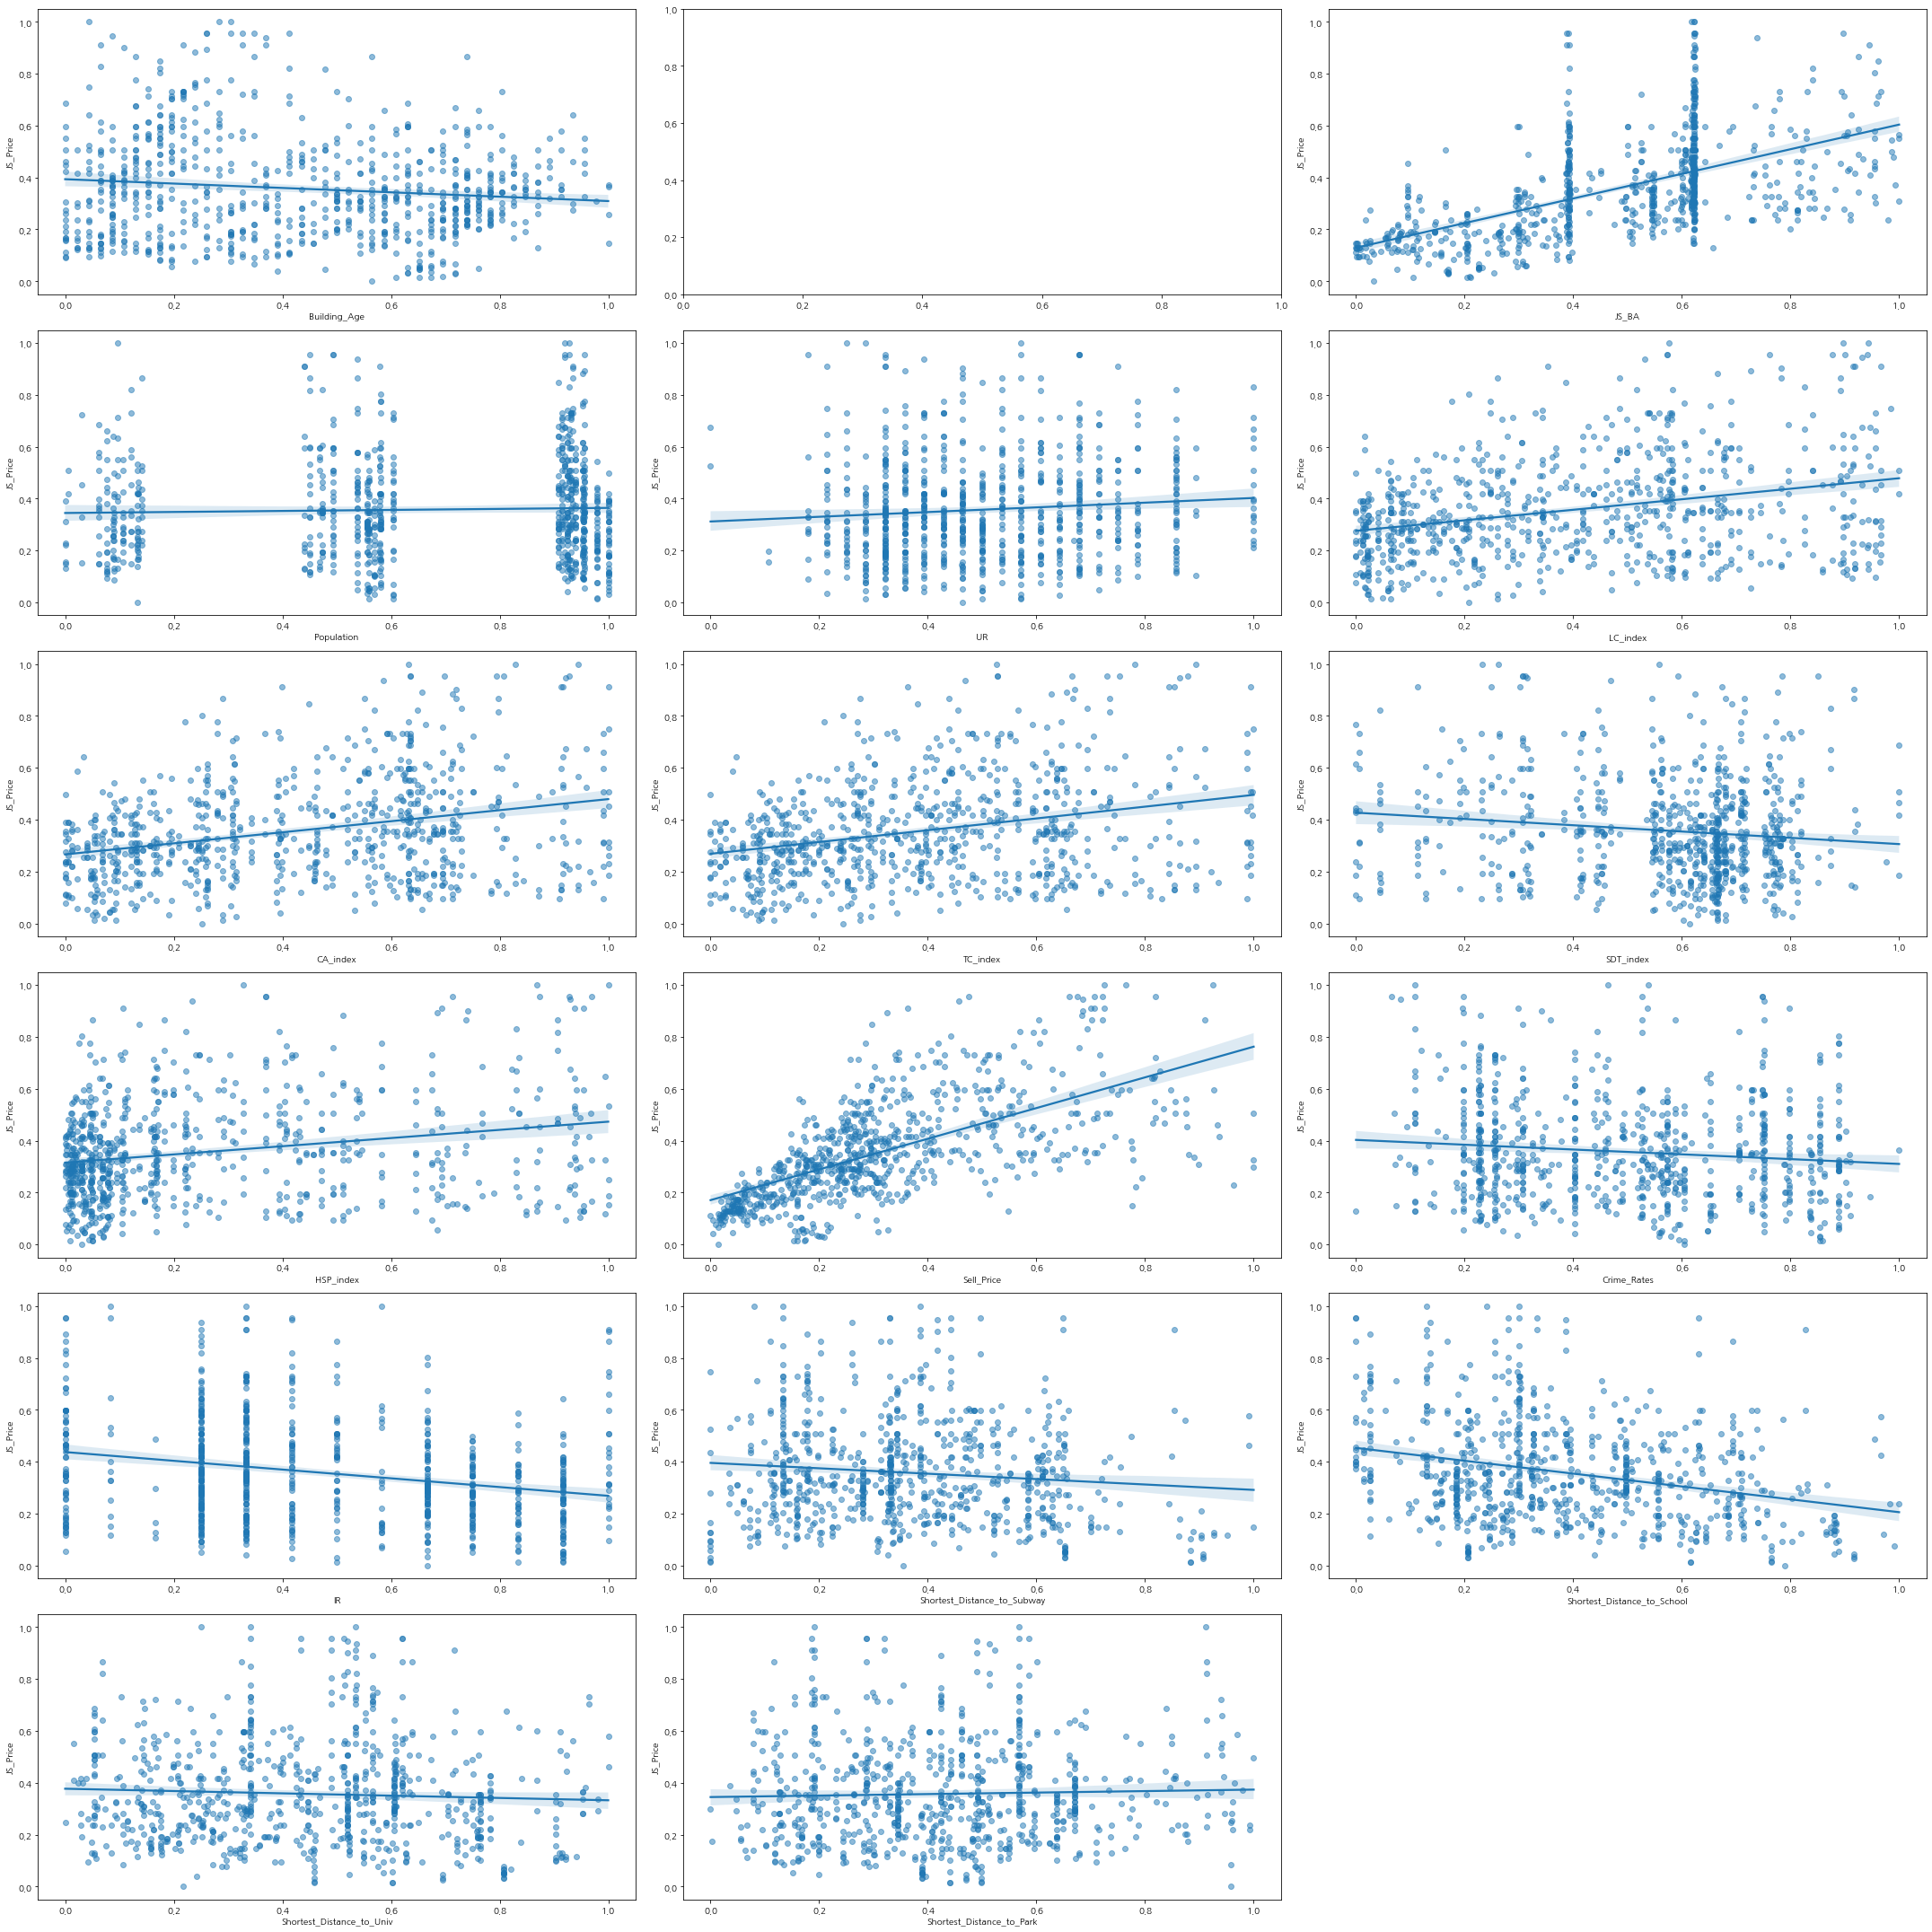

In [15]:
count = len(df_encoded.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30,30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

# 독립 변수와 종속 변수 간의 선형 관계 확인
for i, independent_column in enumerate(df_encoded.columns):
    if independent_column != 'JS_Price':
        if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
            sns.regplot(x=independent_column, y='JS_Price', data=df_encoded, ax=ax[i], scatter_kws={'alpha': 0.5})
            ax[i].set_xlabel(independent_column)
            ax[i].set_ylabel('JS_Price')

# 남은 subplot 비우기
for i in range(len(df_encoded.columns), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

### 이상치 확인

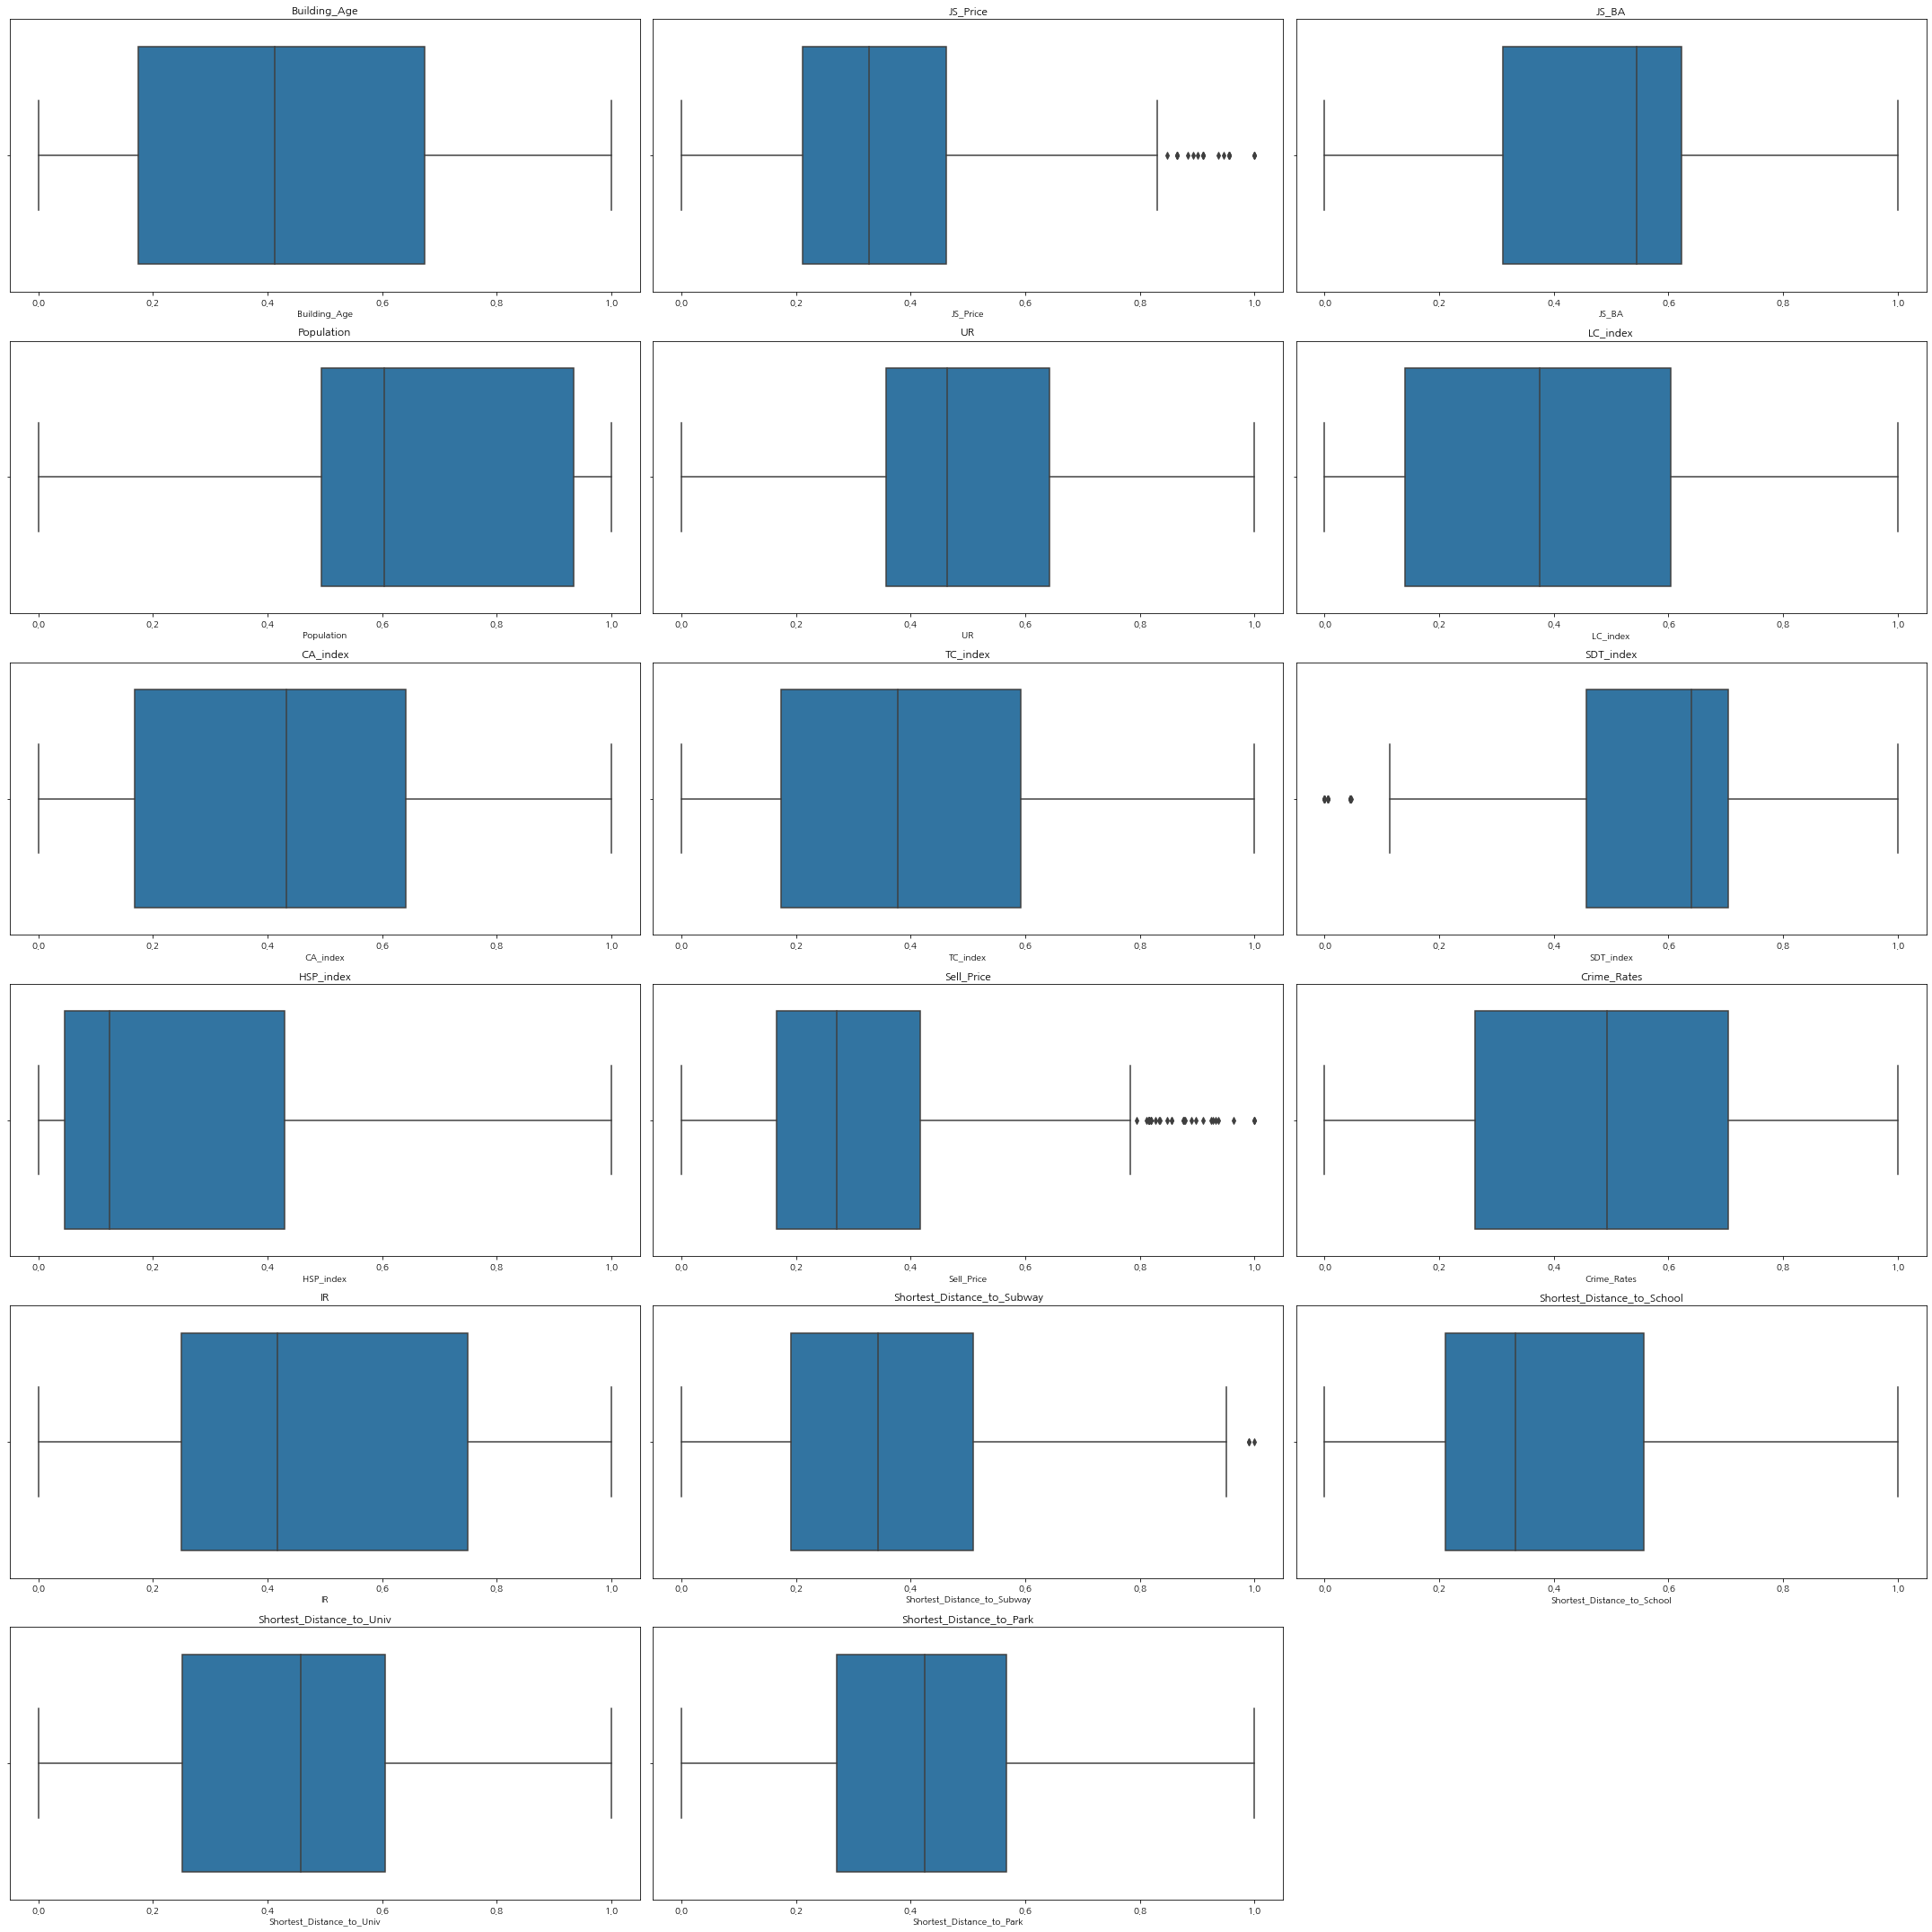

In [16]:
count = len(df_encoded.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30, 30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

# 그래프를 그릴 컬럼 목록
columns_to_plot = [column for column in df_encoded.columns]

for i, column in enumerate(columns_to_plot):
    if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
        sns.boxplot(x=column, data=df_encoded, ax=ax[i], orient='v')
        ax[i].set_title(column)

# 남은 subplot 비우기
for i in range(len(columns_to_plot), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

### 정규성 확인

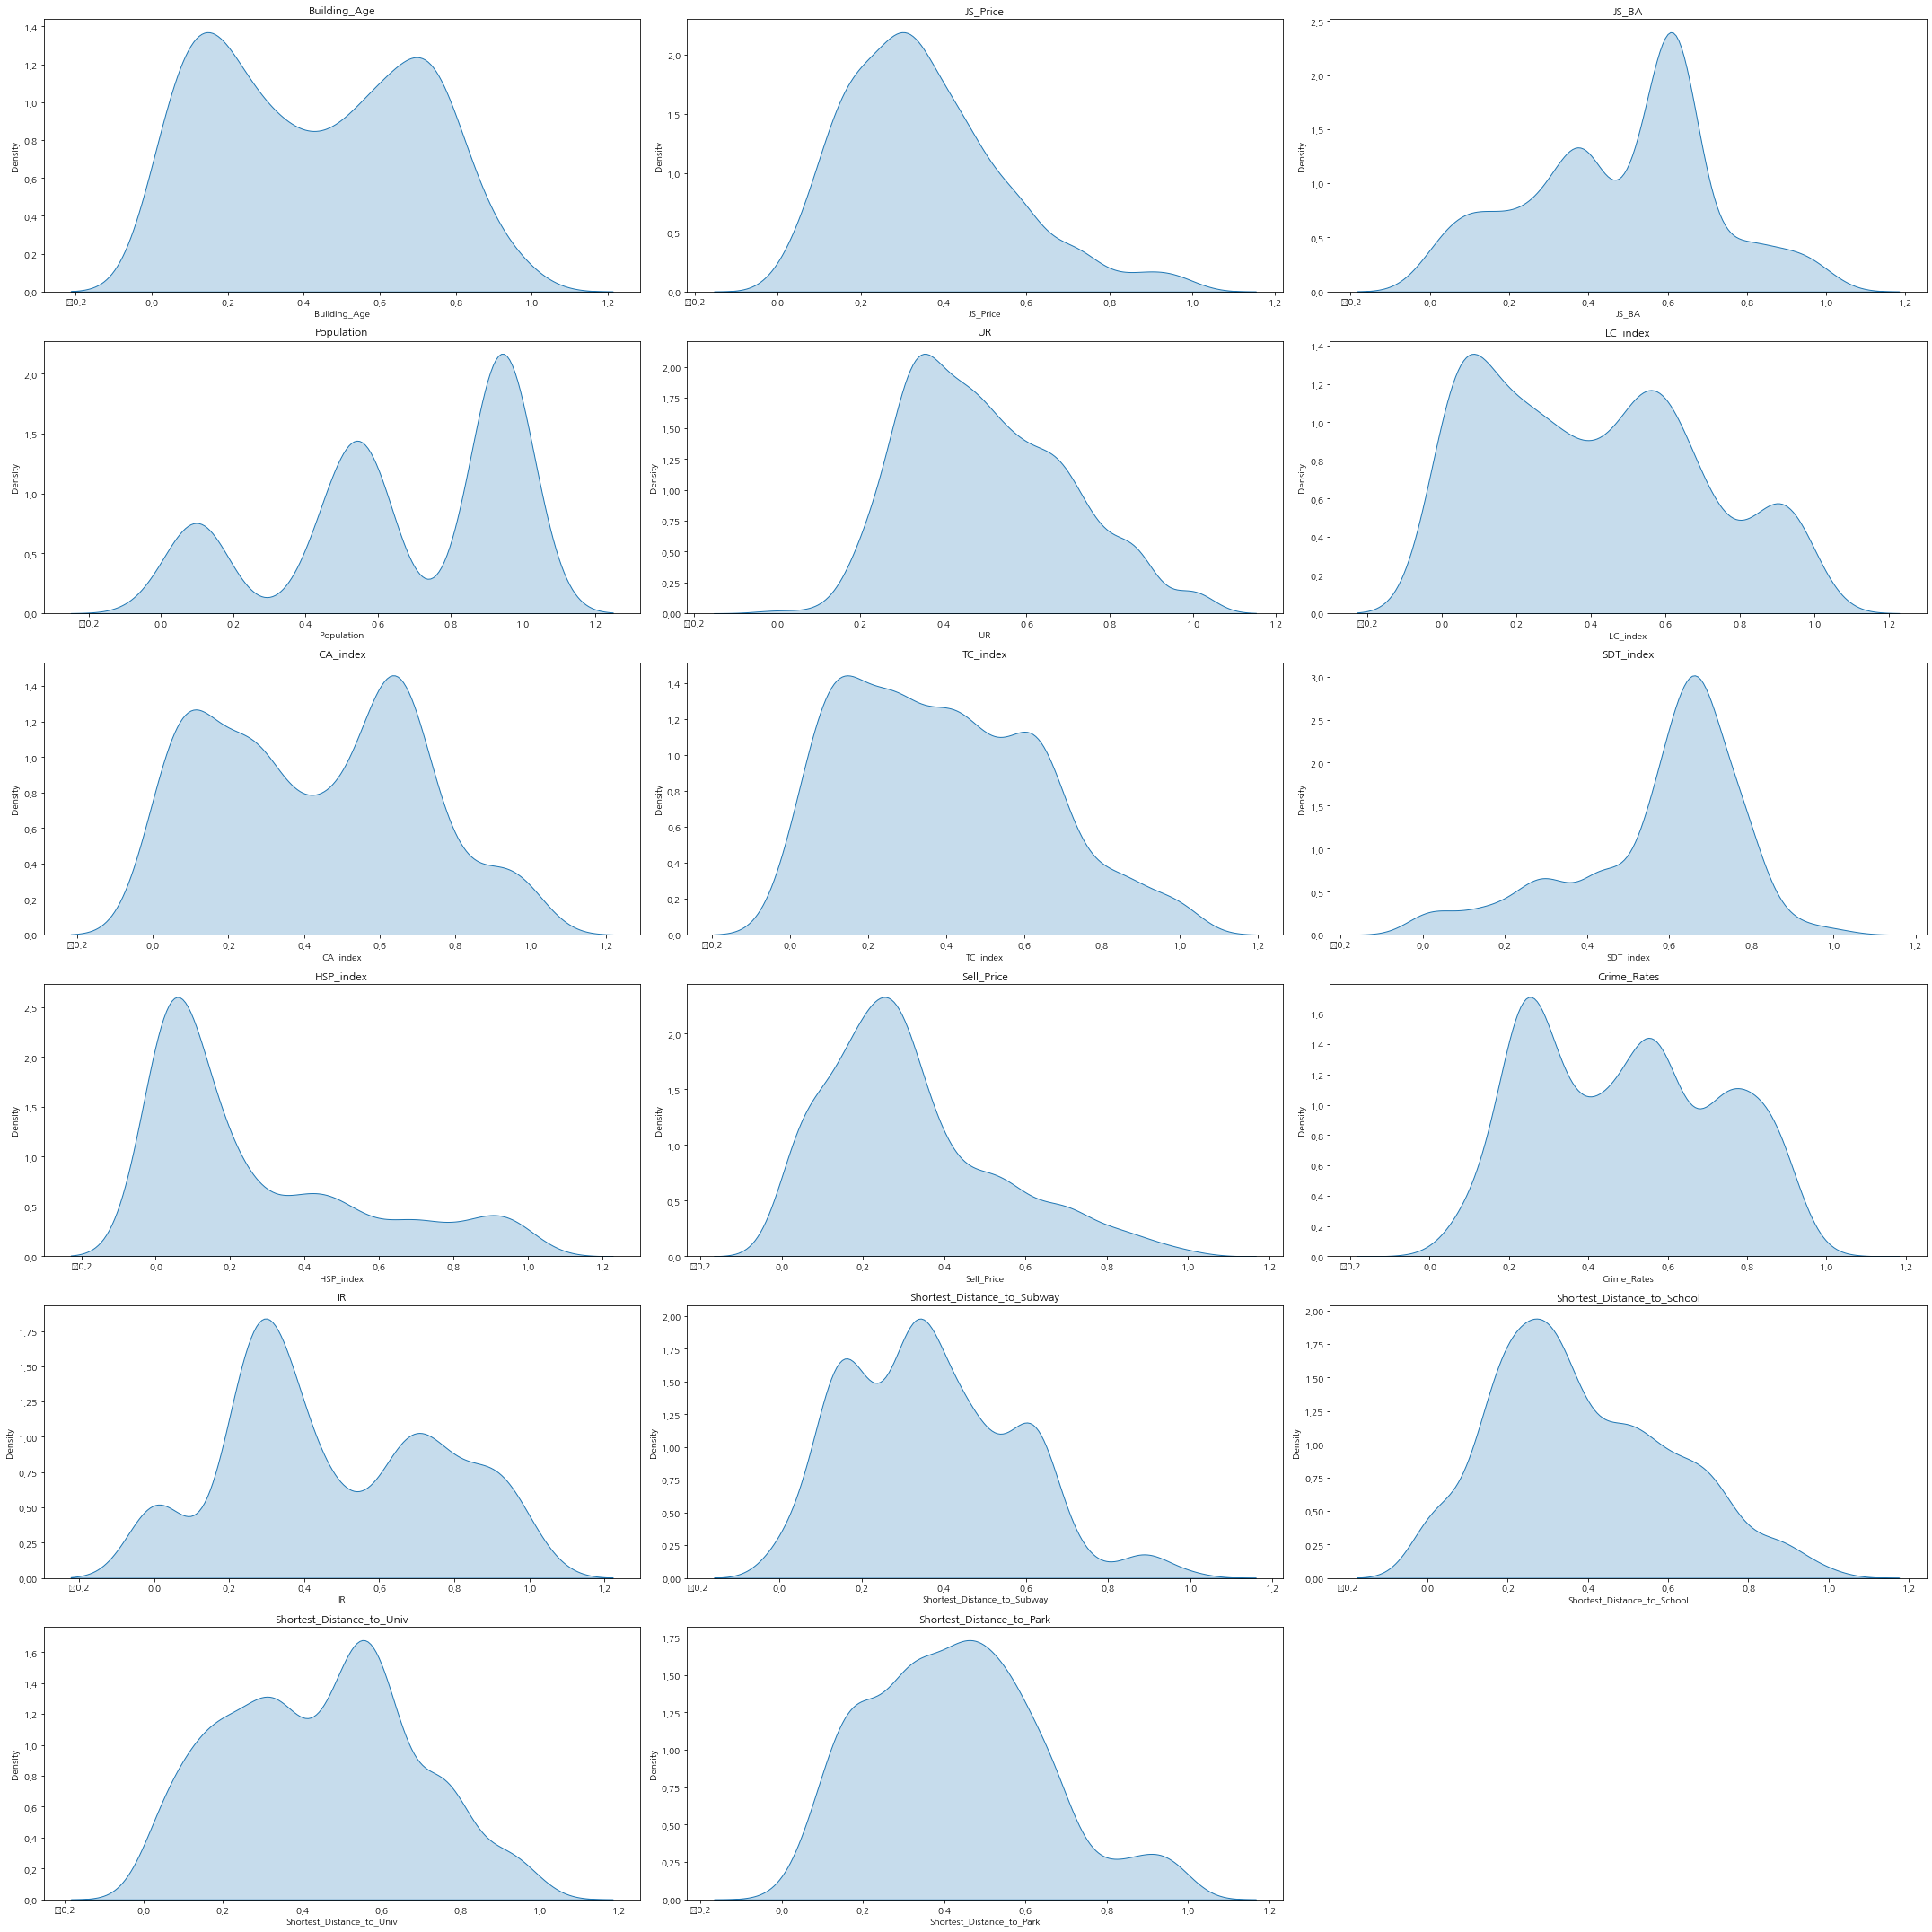

In [17]:
count = len(df_encoded.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30, 30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

# 그래프를 그릴 컬럼 목록
columns_to_plot = [column for column in df_encoded.columns]

for i, column in enumerate(columns_to_plot):
    if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
        sns.kdeplot(data=df_encoded[column], ax=ax[i], shade=True)
        ax[i].set_title(column)

# 남은 subplot 비우기
for i in range(len(columns_to_plot), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

In [18]:
for column in df_encoded.columns:
    print(f"{column}의 왜도는", scipy.stats.skew(df_encoded[column]))

Building_Age의 왜도는 0.10141013370853577
JS_Price의 왜도는 0.8354714507930389
JS_BA의 왜도는 -0.15512275653738605
Population의 왜도는 -0.6170600528698362
UR의 왜도는 0.47942295723451434
LC_index의 왜도는 0.32300188255348083
CA_index의 왜도는 0.14739895917242335
TC_index의 왜도는 0.4262904537822987
SDT_index의 왜도는 -1.029543302923242
HSP_index의 왜도는 1.1398457437487732
Sell_Price의 왜도는 0.9243773123665064
Crime_Rates의 왜도는 0.14203604873864845
IR의 왜도는 0.178683376925511
Shortest_Distance_to_Subway의 왜도는 0.47878959652966074
Shortest_Distance_to_School의 왜도는 0.4659287895558484
Shortest_Distance_to_Univ의 왜도는 0.12600791398076996
Shortest_Distance_to_Park의 왜도는 0.4277671003182255


## Regression Analysis

In [19]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 1 to 4991
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Building_Age                 805 non-null    float64
 1   JS_Price                     805 non-null    float64
 2   JS_BA                        805 non-null    float64
 3   Population                   805 non-null    float64
 4   UR                           805 non-null    float64
 5   LC_index                     805 non-null    float64
 6   CA_index                     805 non-null    float64
 7   TC_index                     805 non-null    float64
 8   SDT_index                    805 non-null    float64
 9   HSP_index                    805 non-null    float64
 10  Sell_Price                   805 non-null    float64
 11  Crime_Rates                  805 non-null    float64
 12  IR                           805 non-null    float64
 13  Shortest_Distance_t

In [20]:
selected_features = ['HSP_index',
 'IR',
 'SDT_index',
 'Sell_Price',
 'Building_Age',
 'Shortest_Distance_to_Subway',
 'LC_index',
 'JS_BA',
 'CA_index',
 'Shortest_Distance_to_Park',
 'TC_index']

# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     216.0
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          7.40e-230
Time:                        12:22:09   Log-Likelihood:                 727.41
No. Observations:                 805   AIC:                            -1431.
Df Residuals:                     793   BIC:                            -1375.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## 변수선택법
- 다중공선성과 회귀계수의 통계적 유의성 고려하여 진행

In [21]:
# X 데이터에서 상수항 제거 (VIF 계산에서 상수항은 제외해야 함)
X_without_constant = X.drop('const', axis=1)

# VIF 계산
vif = pd.DataFrame()
vif["Features"] = X_without_constant.columns
vif["VIF"] = [variance_inflation_factor(X_without_constant.values, i) for i in range(X_without_constant.shape[1])]

In [22]:
vif

,Features,VIF
0,HSP_index,44.457398
1,IR,9.861224
2,SDT_index,9.095964
3,Sell_Price,6.220601
4,Building_Age,4.193195
5,Shortest_Distance_to_Subway,4.293922
6,LC_index,1393.622113
7,JS_BA,7.858359
8,CA_index,694.030152
9,Shortest_Distance_to_Park,5.149725


In [23]:
model = pd.DataFrame(model.summary().tables[1])
model

,0,1,2,3,4,5,6
0,,coef,std err,t,P>|t|,[0.025,0.975]
1,const,0.0093,0.036,0.257,0.797,-0.062,0.080
2,HSP_index,-0.2815,0.060,-4.701,0.000,-0.399,-0.164
3,IR,0.0142,0.024,0.587,0.557,-0.033,0.062
4,SDT_index,0.0562,0.030,1.877,0.061,-0.003,0.115
5,Sell_Price,0.4487,0.023,19.629,0.000,0.404,0.494
6,Building_Age,-0.3098,0.014,-22.066,0.000,-0.337,-0.282
7,Shortest_Distance_to_Subway,-0.0308,0.018,-1.758,0.079,-0.065,0.004
8,LC_index,0.7490,0.273,2.739,0.006,0.212,1.286
9,JS_BA,0.4359,0.019,23.235,0.000,0.399,0.473


In [24]:
delete_columns = []
for i in range(2, len(model.index)):
    if float(model.iloc[i, 4].data) > 0.05 and vif['VIF'].iloc[i-2] > 10:
        delete_columns.append(model.iloc[i, 0].data)
delete_columns

['CA_index', 'TC_index']

In [25]:
selected_features = list(set(selected_features) - set(delete_columns))
selected_features

['LC_index',
 'Sell_Price',
 'SDT_index',
 'Shortest_Distance_to_Subway',
 'IR',
 'JS_BA',
 'HSP_index',
 'Building_Age',
 'Shortest_Distance_to_Park']

In [28]:
# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     263.5
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          1.05e-231
Time:                        12:22:53   Log-Likelihood:                 726.06
No. Observations:                 805   AIC:                            -1432.
Df Residuals:                     795   BIC:                            -1385.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [29]:
model = pd.DataFrame(model.summary().tables[1])
model

,0,1,2,3,4,5,6
0,,coef,std err,t,P>|t|,[0.025,0.975]
1,const,0.0037,0.031,0.119,0.905,-0.058,0.065
2,LC_index,0.4092,0.044,9.334,0.000,0.323,0.495
3,Sell_Price,0.4500,0.023,19.694,0.000,0.405,0.495
4,SDT_index,0.0705,0.023,3.124,0.002,0.026,0.115
5,Shortest_Distance_to_Subway,-0.0308,0.018,-1.758,0.079,-0.065,0.004
6,IR,-0.0077,0.020,-0.389,0.697,-0.046,0.031
7,JS_BA,0.4369,0.019,23.319,0.000,0.400,0.474
8,HSP_index,-0.2410,0.035,-6.854,0.000,-0.310,-0.172
9,Building_Age,-0.3112,0.014,-22.217,0.000,-0.339,-0.284


In [30]:
delete_columns = []
for i in range(2, len(model.index)):
    if float(model.iloc[i, 4].data) > 0.05:
        delete_columns.append(model.iloc[i, 0].data)
delete_columns

['Shortest_Distance_to_Subway', 'IR', 'Shortest_Distance_to_Park']

In [31]:
selected_features = list(set(selected_features) - set(delete_columns))
selected_features

['LC_index', 'Sell_Price', 'SDT_index', 'JS_BA', 'HSP_index', 'Building_Age']

In [32]:
# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     393.8
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          1.34e-234
Time:                        12:22:53   Log-Likelihood:                 723.84
No. Observations:                 805   AIC:                            -1434.
Df Residuals:                     798   BIC:                            -1401.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0080      0.018     -0.448   

- 모든 변수가 통계적으로 유의한 것을 확인할 수 있다.

## 모델가정 확인

### 선형성
- 선형성은 계수의 유의성 검정과 다중공선성을 고려하여 변수를 걸러냄으로써 어느 정도 만족하는 것으로 보인다.

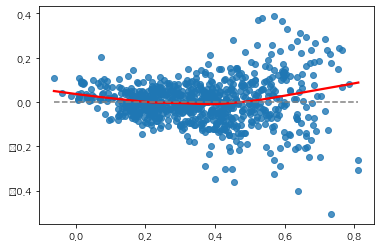

In [33]:
fitted = model.predict(X)
residual = df_encoded['JS_Price'] - fitted

sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color':'red'})

plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

### 정규성

ShapiroResult(statistic=0.9615706205368042, pvalue=1.0726657870318082e-13)

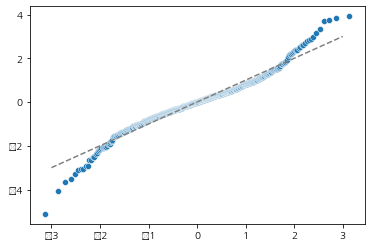

In [34]:
fitted = model.predict(X)
residual = df_encoded['JS_Price'] - fitted
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

# Scatterplot 그리기
sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

# Shapiro-Wilk 정규성 검정
scipy.stats.shapiro(residual)

- 정규성 만족을 위해 종속변수 로그변환한 뒤 다시 정규성 확인

In [35]:
df_encoded['JS_Price'] = np.log(df_encoded['JS_Price']+1)

In [36]:
# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

ShapiroResult(statistic=0.968469500541687, pvalue=3.5956968739286888e-12)

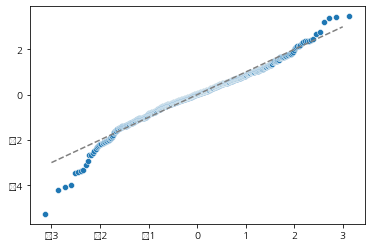

In [37]:
fitted = model.predict(X)
residual = df_encoded['JS_Price'] - fitted
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

# 회귀분석 모델을 통해 얻은 잔차 계산
residual = df_encoded['JS_Price'] - fitted

# 잔차의 Z-score 계산
sr = stats.zscore(residual)

# Scatterplot 그리기
sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

# Shapiro-Wilk 정규성 검정
scipy.stats.shapiro(residual)

### 등분산성

<AxesSubplot:>

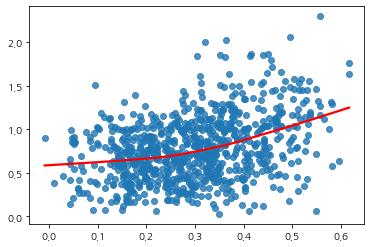

In [38]:
sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

### 독립성

In [39]:
print(model.summary().tables[2])

Omnibus:                       83.488   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.213
Skew:                          -0.500   Prob(JB):                     1.71e-55
Kurtosis:                       5.553   Cond. No.                         19.2


- Durbin-Watson:2.013로 1.5~2.5사이이므로 잔차 간의 자기상관이 없다고 할 수 있으며, 회귀 모델은 독립성 가정을 만족

## 최종 모델 점검

In [40]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     445.2
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          1.06e-250
Time:                        12:22:54   Log-Likelihood:                 1036.1
No. Observations:                 805   AIC:                            -2058.
Df Residuals:                     798   BIC:                            -2025.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0264      0.012      2.187   

In [41]:
model.params.sort_values(ascending=False)

JS_BA           0.325112
Sell_Price      0.322125
LC_index        0.307877
SDT_index       0.052629
const           0.026390
HSP_index      -0.188860
Building_Age   -0.215832
dtype: float64